In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('df.csv')
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DRD340,DRD360,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
0,73557,8,2,1,69,NaN,4,4,1,NaN,...,6.586219,-6.527018,9.182882,-9.018023,-6.181923,5.151193,-9.708139,2.814690,-2.712184,-6.811191
1,73558,8,2,1,54,NaN,3,3,1,NaN,...,-9.588554,1.863741,-9.378731,8.289190,-2.561066,-3.755943,1.406037,7.590942,0.480820,-4.636475
2,73559,8,2,1,72,NaN,3,3,2,NaN,...,-5.229054,6.379788,-9.433054,-9.285869,9.248429,-7.439368,8.374918,8.401561,-9.936335,0.913262
3,73560,8,2,1,9,NaN,3,3,1,119.0,...,7.428271,-1.193575,6.972074,-0.257756,-5.087773,8.581422,4.767615,9.760521,-4.708915,7.624684
4,73561,8,2,2,73,NaN,3,3,1,NaN,...,2.125105,-2.906226,1.977286,-1.322955,-1.034636,6.702919,-1.735375,-4.799543,1.194572,-7.098007


In [5]:
df.shape

(9813, 636)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 636 entries, SEQN to LBXSAPSI
dtypes: float64(615), int64(21)
memory usage: 47.6 MB


In [7]:
df.columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM',
       ...
       'DRD340', 'DRD360', 'URXUMA', 'URXUMS', 'URXUCR.x', 'URXCRS', 'URDACT',
       'LBXSAL', 'LBDSALSI', 'LBXSAPSI'],
      dtype='object', length=636)

In [8]:
df.set_index('SEQN',inplace=True)

In [9]:
df.columns[(df.isnull().sum()/df.shape[0])>0.7]

Index(['RIDAGEMN', 'DMQADFC', 'DMDYRSUS', 'DMDEDUC3', 'RIDEXPRG', 'DR1SKY',
       'DRQSDT1', 'DRQSDT2', 'DRQSDT3', 'DRQSDT4',
       ...
       'URXUSR', 'URDUSRLC', 'URXUTL', 'URDUTLLC', 'URXUTU', 'URDUTULC',
       'URXUUR', 'URDUURLC', 'URXPREG', 'URXUAS'],
      dtype='object', length=303)

In [10]:
df.shape

(9813, 635)

In [11]:
cols_to_be_selected = [i for i in df.columns if i not in df.columns[(df.isnull().sum()/df.shape[0])>0.7]]

In [12]:
len(cols_to_be_selected)

332

In [13]:
df = df[cols_to_be_selected]

In [14]:
df.fillna(df.median(),inplace=True)

In [15]:
df.isnull().sum()

SDDSRVYR    0
RIDSTATR    0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
           ..
URXCRS      0
URDACT      0
LBXSAL      0
LBDSALSI    0
LBXSAPSI    0
Length: 332, dtype: int64

# Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scale = StandardScaler()
df_scaled = scale.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.shape

(9813, 332)

In [18]:
df_scaled.head()

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMDBORN4,...,DRD340,DRD360,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
0,0.0,0.0,-1.015508,1.531807,0.725587,0.449104,-1.017166,-0.042012,-4.112188,-0.139098,...,1.248422,-1.086135,1.794467,-2.029602,-1.129412,0.548827,-1.740461,0.000698,-0.504733,-1.184963
1,0.0,0.0,-1.015508,0.916959,-0.066337,-0.172835,-1.017166,-0.042012,0.229168,-0.139098,...,-1.178272,0.283619,-1.571961,1.540897,-0.518483,-1.046665,0.059775,0.828889,0.151146,-0.764688
2,0.0,0.0,-1.015508,1.654776,-0.066337,-0.172835,0.983124,-0.042012,-4.112188,-0.139098,...,-0.524218,1.020844,-1.581814,-2.084860,1.474072,-1.706459,1.188571,0.969449,-1.988656,0.307827
3,0.0,0.0,-1.015508,-0.927582,-0.066337,-0.172835,-1.017166,0.307586,0.229168,-0.139098,...,1.374755,-0.215474,1.393503,-0.222349,-0.944801,1.163267,0.604272,1.205089,-0.914885,1.604843
4,0.0,0.0,0.984729,1.695766,-0.066337,-0.172835,-1.017166,-0.042012,0.229168,-0.139098,...,0.579123,-0.495056,0.487623,-0.442100,-0.260936,0.826780,-0.449060,-1.319593,0.297759,-1.240391


In [19]:
df_scaled.set_index(df.index,inplace=True)

In [20]:
df_scaled.head()

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMDBORN4,...,DRD340,DRD360,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,0.0,0.0,-1.015508,1.531807,0.725587,0.449104,-1.017166,-0.042012,-4.112188,-0.139098,...,1.248422,-1.086135,1.794467,-2.029602,-1.129412,0.548827,-1.740461,0.000698,-0.504733,-1.184963
73558,0.0,0.0,-1.015508,0.916959,-0.066337,-0.172835,-1.017166,-0.042012,0.229168,-0.139098,...,-1.178272,0.283619,-1.571961,1.540897,-0.518483,-1.046665,0.059775,0.828889,0.151146,-0.764688
73559,0.0,0.0,-1.015508,1.654776,-0.066337,-0.172835,0.983124,-0.042012,-4.112188,-0.139098,...,-0.524218,1.020844,-1.581814,-2.084860,1.474072,-1.706459,1.188571,0.969449,-1.988656,0.307827
73560,0.0,0.0,-1.015508,-0.927582,-0.066337,-0.172835,-1.017166,0.307586,0.229168,-0.139098,...,1.374755,-0.215474,1.393503,-0.222349,-0.944801,1.163267,0.604272,1.205089,-0.914885,1.604843
73561,0.0,0.0,0.984729,1.695766,-0.066337,-0.172835,-1.017166,-0.042012,0.229168,-0.139098,...,0.579123,-0.495056,0.487623,-0.442100,-0.260936,0.826780,-0.449060,-1.319593,0.297759,-1.240391


In [21]:
df_scaled.fillna(df.mean(),inplace=True)

# PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

In [24]:
pca.explained_variance_ratio_

array([1.18996287e-01, 4.79615037e-02, 3.42546389e-02, 3.33462606e-02,
       2.42656573e-02, 2.11943062e-02, 1.89063183e-02, 1.73341493e-02,
       1.64991956e-02, 1.61728528e-02, 1.56289233e-02, 1.41293600e-02,
       1.33192556e-02, 1.18800015e-02, 1.08901224e-02, 1.04661413e-02,
       9.95902914e-03, 9.77295999e-03, 9.10021234e-03, 8.28454936e-03,
       8.20177536e-03, 7.92159245e-03, 7.83135462e-03, 7.67556842e-03,
       7.37019598e-03, 7.15990586e-03, 6.89906085e-03, 6.79612183e-03,
       6.65565507e-03, 6.65128657e-03, 6.33416198e-03, 6.32145254e-03,
       6.24766348e-03, 6.10751323e-03, 6.04818595e-03, 5.94805562e-03,
       5.77984259e-03, 5.72433004e-03, 5.57955506e-03, 5.49519563e-03,
       5.43625759e-03, 5.40060375e-03, 5.27938143e-03, 5.14174621e-03,
       5.09166144e-03, 4.98851809e-03, 4.90086798e-03, 4.81967292e-03,
       4.65169059e-03, 4.53069918e-03, 4.48734395e-03, 4.44279195e-03,
       4.36012553e-03, 4.35714524e-03, 4.25967638e-03, 4.20940000e-03,
      

In [25]:
cumvar = np.cumsum(pca.explained_variance_ratio_)
cumvar

array([0.11899629, 0.16695779, 0.20121243, 0.23455869, 0.25882435,
       0.28001865, 0.29892497, 0.31625912, 0.33275832, 0.34893117,
       0.36456009, 0.37868945, 0.39200871, 0.40388871, 0.41477883,
       0.42524497, 0.435204  , 0.44497696, 0.45407718, 0.46236173,
       0.4705635 , 0.47848509, 0.48631645, 0.49399202, 0.50136221,
       0.50852212, 0.51542118, 0.5222173 , 0.52887296, 0.53552424,
       0.5418584 , 0.54817986, 0.55442752, 0.56053503, 0.56658322,
       0.57253127, 0.57831112, 0.58403545, 0.589615  , 0.5951102 ,
       0.60054646, 0.60594706, 0.61122644, 0.61636819, 0.62145985,
       0.62644837, 0.63134923, 0.63616891, 0.6408206 , 0.6453513 ,
       0.64983864, 0.65428143, 0.65864156, 0.6629987 , 0.66725838,
       0.67146778, 0.67555758, 0.67963412, 0.68370315, 0.68772563,
       0.69165183, 0.69549511, 0.69933204, 0.70315643, 0.70689748,
       0.71059573, 0.71426524, 0.71788838, 0.72148645, 0.72504195,
       0.72856042, 0.7320614 , 0.73552201, 0.73893226, 0.74231

In [26]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = df_scaled.shape[1])
pca_data = pca.fit_transform(df_scaled)
exp_var_ratio= pca.explained_variance_ratio_
exp_var_ratio.round(3)

cum_var=exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var=cum_var+j
    if cum_var >= 0.999:
        break
    itr=itr+1

print('The number of principle components capturing 100 percent varaition is data is : ',itr,' Varaince explained is ', cum_var)

The number of principle components capturing 100 percent varaition is data is :  248  Varaince explained is  0.9990524420209371


Text(0, 0.5, 'Variance Ratio')

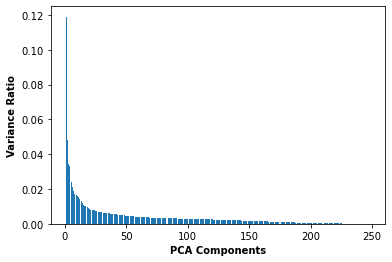

In [27]:
# Variance Ratio bar plot for each PCA components.
pc=exp_var_ratio[:itr]
ax = plt.bar(range(1,len(pc)+1), pc)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

In [29]:
pca = PCA(n_components=248)
df_pca = pca.fit_transform(df_scaled)

In [30]:
df_pca = pd.DataFrame(df_pca)
df_pca.shape

(9813, 248)

In [31]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,-0.462975,1.548795,-2.272740,4.756733,2.018791,1.377846,7.903637,1.433496,-0.703741,-0.969433,...,-0.003797,0.052699,-0.135132,0.216945,-0.066731,0.101812,-0.100837,0.002492,0.166169,0.019196
1,-0.836774,6.713096,5.513717,-2.893685,4.034312,2.444737,1.692802,-0.101285,0.621883,-2.890896,...,-0.028019,0.621632,-0.683290,0.406424,0.139566,-0.058124,0.105528,-0.041569,0.662459,-0.133570
2,-1.077972,4.973953,-0.913628,-0.232833,-3.480180,-0.762841,8.590366,0.839731,-5.485762,0.669914,...,0.007431,0.027899,-0.127962,-0.071523,0.026610,0.001886,-0.042560,0.074892,0.110686,0.003605
3,-1.624947,-3.934733,3.057131,0.749484,-3.283804,0.266747,1.252662,1.916853,1.585839,-0.039433,...,0.016247,0.034775,0.014056,0.013191,0.015998,-0.008077,-0.038594,0.022477,0.030858,-0.000905
4,-0.846366,4.322626,-1.529349,4.967514,-4.019762,1.239826,0.949670,-3.868770,-2.606126,1.599921,...,0.013949,0.061597,0.009669,0.199108,-0.027390,-0.033607,0.034358,-0.041960,0.174517,-0.006746


In [32]:
df_pca.set_index(df.index,inplace=True)

In [33]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,-0.462975,1.548795,-2.272740,4.756733,2.018791,1.377846,7.903637,1.433496,-0.703741,-0.969433,...,-0.003797,0.052699,-0.135132,0.216945,-0.066731,0.101812,-0.100837,0.002492,0.166169,0.019196
73558,-0.836774,6.713096,5.513717,-2.893685,4.034312,2.444737,1.692802,-0.101285,0.621883,-2.890896,...,-0.028019,0.621632,-0.683290,0.406424,0.139566,-0.058124,0.105528,-0.041569,0.662459,-0.133570
73559,-1.077972,4.973953,-0.913628,-0.232833,-3.480180,-0.762841,8.590366,0.839731,-5.485762,0.669914,...,0.007431,0.027899,-0.127962,-0.071523,0.026610,0.001886,-0.042560,0.074892,0.110686,0.003605
73560,-1.624947,-3.934733,3.057131,0.749484,-3.283804,0.266747,1.252662,1.916853,1.585839,-0.039433,...,0.016247,0.034775,0.014056,0.013191,0.015998,-0.008077,-0.038594,0.022477,0.030858,-0.000905
73561,-0.846366,4.322626,-1.529349,4.967514,-4.019762,1.239826,0.949670,-3.868770,-2.606126,1.599921,...,0.013949,0.061597,0.009669,0.199108,-0.027390,-0.033607,0.034358,-0.041960,0.174517,-0.006746


# SVD

In [34]:
from sklearn.decomposition import TruncatedSVD

In [35]:
svd = TruncatedSVD(n_components=df_scaled.shape[1]-1)
svd_data = svd.fit_transform(df_scaled)

In [36]:
exp_var_ratio = svd.explained_variance_ratio_
exp_var_ratio

array([1.18996287e-01, 4.79615037e-02, 3.42546389e-02, 3.33462606e-02,
       2.42656573e-02, 2.11943062e-02, 1.89063183e-02, 1.73341493e-02,
       1.64991956e-02, 1.61728528e-02, 1.56289233e-02, 1.41293600e-02,
       1.33192556e-02, 1.18800015e-02, 1.08901224e-02, 1.04661413e-02,
       9.95902914e-03, 9.77295999e-03, 9.10021234e-03, 8.28454936e-03,
       8.20177536e-03, 7.92159245e-03, 7.83135462e-03, 7.67556842e-03,
       7.37019598e-03, 7.15990586e-03, 6.89906085e-03, 6.79612183e-03,
       6.65565507e-03, 6.65128657e-03, 6.33416198e-03, 6.32145254e-03,
       6.24766348e-03, 6.10751323e-03, 6.04818595e-03, 5.94805562e-03,
       5.77984259e-03, 5.72433004e-03, 5.57955506e-03, 5.49519563e-03,
       5.43625759e-03, 5.40060375e-03, 5.27938143e-03, 5.14174621e-03,
       5.09166144e-03, 4.98851809e-03, 4.90086798e-03, 4.81967292e-03,
       4.65169059e-03, 4.53069918e-03, 4.48734395e-03, 4.44279195e-03,
       4.36012553e-03, 4.35714524e-03, 4.25967638e-03, 4.20940000e-03,
      

In [37]:
cumvar_svd = np.cumsum(svd.explained_variance_ratio_)
cumvar_svd

array([0.11899629, 0.16695779, 0.20121243, 0.23455869, 0.25882435,
       0.28001865, 0.29892497, 0.31625912, 0.33275832, 0.34893117,
       0.36456009, 0.37868945, 0.39200871, 0.40388871, 0.41477883,
       0.42524497, 0.435204  , 0.44497696, 0.45407718, 0.46236173,
       0.4705635 , 0.47848509, 0.48631645, 0.49399202, 0.50136221,
       0.50852212, 0.51542118, 0.5222173 , 0.52887296, 0.53552424,
       0.5418584 , 0.54817986, 0.55442752, 0.56053503, 0.56658322,
       0.57253127, 0.57831112, 0.58403545, 0.589615  , 0.5951102 ,
       0.60054646, 0.60594706, 0.61122644, 0.61636819, 0.62145985,
       0.62644837, 0.63134923, 0.63616891, 0.6408206 , 0.6453513 ,
       0.64983864, 0.65428143, 0.65864156, 0.6629987 , 0.66725838,
       0.67146778, 0.67555758, 0.67963412, 0.68370315, 0.68772563,
       0.69165183, 0.69549511, 0.69933204, 0.70315643, 0.70689748,
       0.71059573, 0.71426524, 0.71788838, 0.72148645, 0.72504195,
       0.72856042, 0.7320614 , 0.73552201, 0.73893226, 0.74231

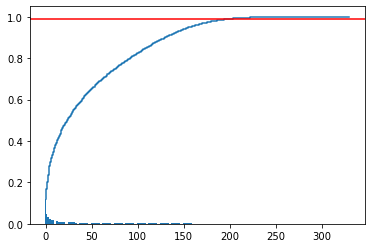

In [38]:
plt.bar(range(len(df_scaled.columns)-1),svd.explained_variance_ratio_)
plt.step(range(len(df_scaled.columns)-1),np.cumsum(svd.explained_variance_ratio_))
plt.axhline(y=0.99,c='r')

In [39]:
cum_var_svd =exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var_svd=cum_var_svd+j
    if cum_var_svd >= 0.999:
        break
    itr=itr+1

print('The number of principle components capturing 95 percent varaition is data is : ',itr,' Varaince explained is ', cum_var)

The number of principle components capturing 95 percent varaition is data is :  248  Varaince explained is  0.9990524420209371


In [40]:
svd = TruncatedSVD(n_components=248)
svd_data = svd.fit_transform(df_scaled)
df_svd = pd.DataFrame(svd_data)
df_svd.shape

(9813, 248)

In [41]:
df_svd.head()

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,-0.462975,1.548795,-2.272740,4.756733,2.018791,1.377846,7.903637,1.433496,-0.703741,-0.969433,...,-0.002952,0.051209,-0.134278,0.217296,-0.068454,0.103573,-0.101235,-0.001031,-0.164299,0.018207
1,-0.836774,6.713096,5.513717,-2.893685,4.034312,2.444737,1.692802,-0.101285,0.621883,-2.890896,...,-0.023378,0.610983,-0.686011,0.404026,0.132584,-0.054146,0.114337,-0.034732,-0.653171,-0.130742
2,-1.077972,4.973953,-0.913628,-0.232833,-3.480180,-0.762841,8.590366,0.839731,-5.485762,0.669914,...,0.007431,0.027315,-0.128512,-0.072219,0.026852,0.004412,-0.044938,0.071048,-0.109706,0.001957
3,-1.624947,-3.934733,3.057131,0.749484,-3.283804,0.266747,1.252662,1.916853,1.585839,-0.039433,...,0.016473,0.035002,0.014174,0.013642,0.015587,-0.008313,-0.040593,0.021189,-0.031003,-0.002028
4,-0.846366,4.322626,-1.529349,4.967514,-4.019762,1.239826,0.949670,-3.868770,-2.606126,1.599921,...,0.013097,0.064883,0.010538,0.200073,-0.026217,-0.037516,0.034388,-0.046002,-0.176356,-0.011170


In [42]:
df_svd.set_index(df.index,inplace=True)
df_svd.head()

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,-0.462975,1.548795,-2.272740,4.756733,2.018791,1.377846,7.903637,1.433496,-0.703741,-0.969433,...,-0.002952,0.051209,-0.134278,0.217296,-0.068454,0.103573,-0.101235,-0.001031,-0.164299,0.018207
73558,-0.836774,6.713096,5.513717,-2.893685,4.034312,2.444737,1.692802,-0.101285,0.621883,-2.890896,...,-0.023378,0.610983,-0.686011,0.404026,0.132584,-0.054146,0.114337,-0.034732,-0.653171,-0.130742
73559,-1.077972,4.973953,-0.913628,-0.232833,-3.480180,-0.762841,8.590366,0.839731,-5.485762,0.669914,...,0.007431,0.027315,-0.128512,-0.072219,0.026852,0.004412,-0.044938,0.071048,-0.109706,0.001957
73560,-1.624947,-3.934733,3.057131,0.749484,-3.283804,0.266747,1.252662,1.916853,1.585839,-0.039433,...,0.016473,0.035002,0.014174,0.013642,0.015587,-0.008313,-0.040593,0.021189,-0.031003,-0.002028
73561,-0.846366,4.322626,-1.529349,4.967514,-4.019762,1.239826,0.949670,-3.868770,-2.606126,1.599921,...,0.013097,0.064883,0.010538,0.200073,-0.026217,-0.037516,0.034388,-0.046002,-0.176356,-0.011170


# K Means

In [43]:
from sklearn.cluster import KMeans

In [44]:
from yellowbrick.cluster import SilhouetteVisualizer

In [45]:
from sklearn.metrics import silhouette_score

Silhoutee score for 2 is 0.45575784038442685


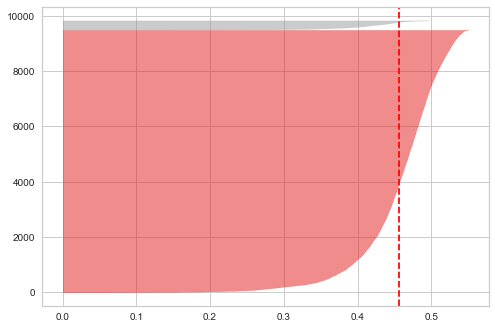

Silhoutee score for 3 is 0.05052823190021366


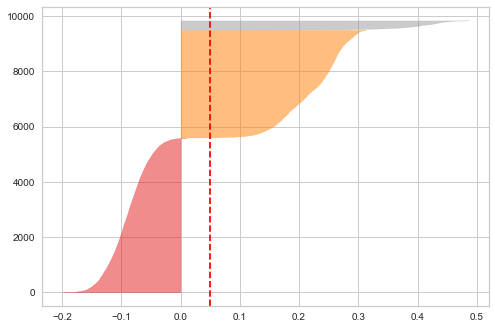

Silhoutee score for 4 is 0.046825024170803024


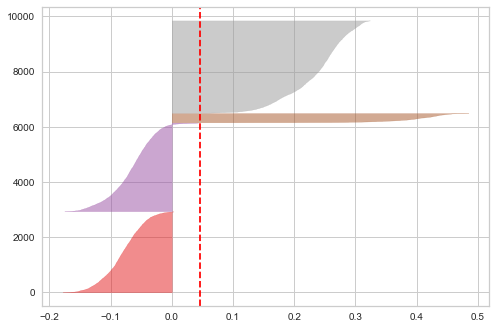

Silhoutee score for 5 is 0.022709552900647762


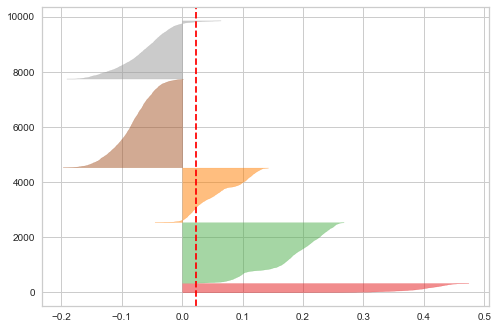

In [46]:
for i in range(2,6):
    km_pca = KMeans(n_clusters=i)
    km_pca.fit(df_pca)
    sil_score_pca = silhouette_score(df_pca,km_pca.labels_)
    
    print('Silhoutee score for',i,'is', sil_score_pca)
    sil_km = SilhouetteVisualizer(km_pca)
    sil_km.fit(df_pca)
    plt.show()

In [48]:
Kmeans_pca = KMeans(n_clusters=2)
kmeans_clusters_pca = Kmeans_pca.fit_predict(df_pca)
kmeans_clusters_pca

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
df_pca_km = df_pca.copy()
df_pca_km['Labels'] = kmeans_clusters_pca
df_pca_km.head(20)

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,Labels
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,-0.462975,1.548795,-2.272740,4.756733,2.018791,1.377846,7.903637,1.433496,-0.703741,-0.969433,...,0.052699,-0.135132,0.216945,-0.066731,0.101812,-0.100837,0.002492,0.166169,0.019196,1
73558,-0.836774,6.713096,5.513717,-2.893685,4.034312,2.444737,1.692802,-0.101285,0.621883,-2.890896,...,0.621632,-0.683290,0.406424,0.139566,-0.058124,0.105528,-0.041569,0.662459,-0.133570,1
73559,-1.077972,4.973953,-0.913628,-0.232833,-3.480180,-0.762841,8.590366,0.839731,-5.485762,0.669914,...,0.027899,-0.127962,-0.071523,0.026610,0.001886,-0.042560,0.074892,0.110686,0.003605,1
73560,-1.624947,-3.934733,3.057131,0.749484,-3.283804,0.266747,1.252662,1.916853,1.585839,-0.039433,...,0.034775,0.014056,0.013191,0.015998,-0.008077,-0.038594,0.022477,0.030858,-0.000905,1
73561,-0.846366,4.322626,-1.529349,4.967514,-4.019762,1.239826,0.949670,-3.868770,-2.606126,1.599921,...,0.061597,0.009669,0.199108,-0.027390,-0.033607,0.034358,-0.041960,0.174517,-0.006746,1
73562,-0.847654,3.041276,1.864923,4.821175,1.326336,-2.485222,2.582885,1.786927,1.389969,-3.149753,...,-0.015226,0.006185,-0.016413,-0.042598,0.053156,0.117985,-0.052940,-0.107241,-0.001639,1
73563,-1.308729,-2.025749,-0.705140,0.352091,-1.556916,1.191986,-0.060062,-0.286545,-0.885115,2.088337,...,0.006090,-0.040802,-0.031383,0.011094,-0.012473,-0.085367,0.035592,0.037001,-0.006833,1
73564,-1.081709,4.563575,0.748499,-1.336290,-4.088894,3.744373,0.545495,0.160178,-2.666594,-0.185152,...,-0.054230,0.046880,-0.077048,0.006477,0.023399,-0.040285,0.019348,-0.008384,-0.017857,1
73566,-0.894008,-0.064704,-2.502632,3.980999,-0.247046,2.810021,-3.275256,-1.448057,0.010905,1.348097,...,0.042554,-0.078562,0.015068,0.019598,0.015455,-0.088752,0.035264,-0.022601,-0.009876,1


In [50]:
df_pca_km['Labels'].value_counts()

1    9480
0     333
Name: Labels, dtype: int64

In [51]:
submission4 = pd.DataFrame()
submission4['SEQN'] = df.index
submission4['Cluster'] = kmeans_clusters_pca
submission4.head()

,SEQN,Cluster
0,73557,1
1,73558,1
2,73559,1
3,73560,1
4,73561,1


In [52]:
submission4.shape

(9813, 2)

In [53]:
submission4.to_csv('SushmaD_4.csv',index=False)

Silhoutee score for 2 is 0.45575778144255846


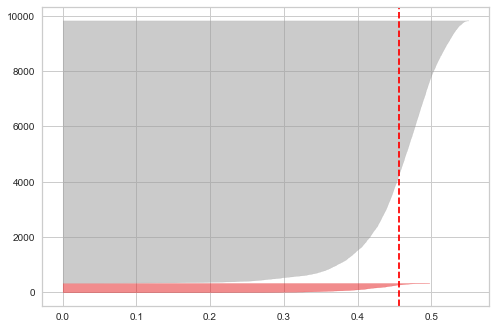

Silhoutee score for 3 is 0.05060559601040773


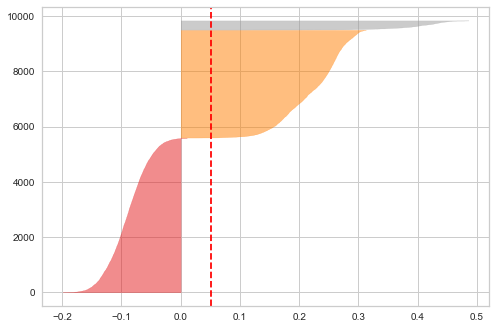

Silhoutee score for 4 is 0.04691212190856805


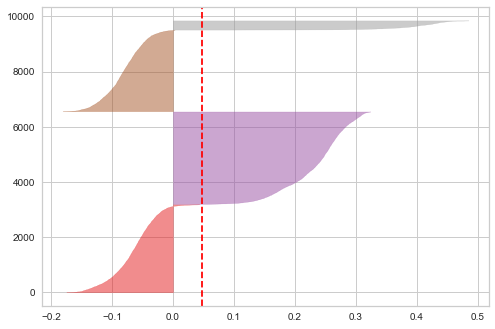

KeyboardInterrupt: 

In [54]:
for i in range(2,6):
    km_svd = KMeans(n_clusters=i)
    km_svd.fit(df_svd)
    sil_score_svd = silhouette_score(df_svd,km_svd.labels_)
    
    print('Silhoutee score for',i,'is', sil_score_svd)
    sil_km = SilhouetteVisualizer(km_svd)
    sil_km.fit(df_svd)
    plt.show()

In [ ]:
km_svd = KMeans(n_clusters=2)
km_svd_predict = km_svd.fit_predict(df_svd)

In [ ]:
df_svd_km = df_svd.copy()
df_svd_km['Labels'] = km_svd_predict
df_svd_km.head(20)

In [ ]:
df_svd_km['Labels'].value_counts()

# Hierarichal Clustering

In [56]:
from scipy.cluster.hierarchy import linkage, dendrogram,cophenet
from scipy.spatial.distance import pdist

single


<Figure size 720x720 with 0 Axes>

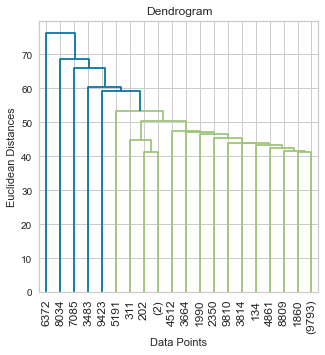

----------------------------------------------
complete


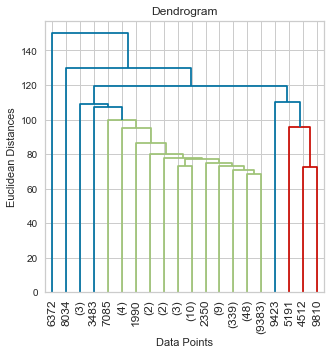

----------------------------------------------
ward


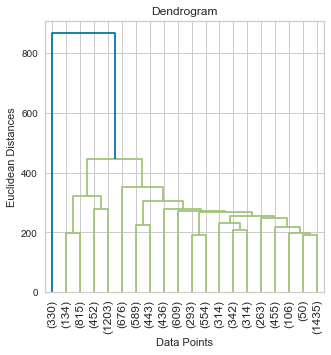

----------------------------------------------
average


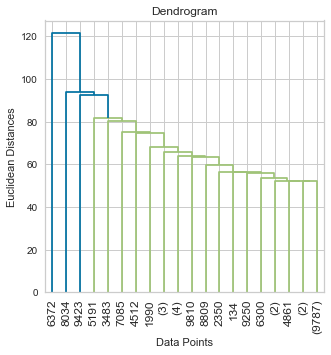

----------------------------------------------
centroid


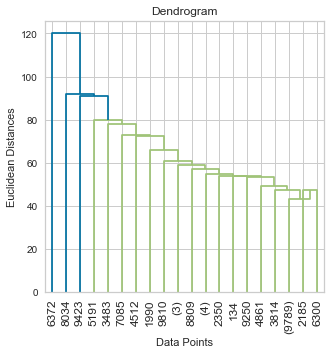

----------------------------------------------


In [57]:
plt.figure(figsize=[10,10])
lin = ['single','complete','ward','average','centroid']
for l in lin:
    plt.figure(figsize=[5,5])
    merg = linkage(df_pca, method=l)
    dendrogram(merg, leaf_rotation=90,truncate_mode='lastp',p=20)
    print(l)

    plt.title('Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean Distances')
    plt.show()
    print('----------------------------------------------')

In [58]:
lin = ['single','complete','ward','average','centroid']

for l in lin:
    merg = linkage(df_pca,method=l)
    c,cop_dist = cophenet(merg,pdist(df_pca))
    print('Cophenetic correlation for',l,'is',c)

Cophenetic correlation for single is 0.9382285096936497
Cophenetic correlation for complete is 0.753730886086473
Cophenetic correlation for ward is 0.4544662866963274
Cophenetic correlation for average is 0.9483695072395535
Cophenetic correlation for centroid is 0.9366708175238528


In [74]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df_pca)

df_h = df_svd.copy(deep=True)
df_h['label'] = cluster2

In [75]:
df_h['label'].value_counts()

0    9812
1       1
Name: label, dtype: int64

In [76]:
df_h.head()

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,label
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,-0.462975,1.548795,-2.272740,4.756733,2.018791,1.377846,7.903637,1.433496,-0.703741,-0.969433,...,0.051209,-0.134278,0.217296,-0.068454,0.103573,-0.101235,-0.001031,-0.164299,0.018207,0
73558,-0.836774,6.713096,5.513717,-2.893685,4.034312,2.444737,1.692802,-0.101285,0.621883,-2.890896,...,0.610983,-0.686011,0.404026,0.132584,-0.054146,0.114337,-0.034732,-0.653171,-0.130742,0
73559,-1.077972,4.973953,-0.913628,-0.232833,-3.480180,-0.762841,8.590366,0.839731,-5.485762,0.669914,...,0.027315,-0.128512,-0.072219,0.026852,0.004412,-0.044938,0.071048,-0.109706,0.001957,0
73560,-1.624947,-3.934733,3.057131,0.749484,-3.283804,0.266747,1.252662,1.916853,1.585839,-0.039433,...,0.035002,0.014174,0.013642,0.015587,-0.008313,-0.040593,0.021189,-0.031003,-0.002028,0
73561,-0.846366,4.322626,-1.529349,4.967514,-4.019762,1.239826,0.949670,-3.868770,-2.606126,1.599921,...,0.064883,0.010538,0.200073,-0.026217,-0.037516,0.034388,-0.046002,-0.176356,-0.011170,0


In [71]:
submission5 = pd.DataFrame()
submission5['SEQN'] = df_h.index
submission5['Cluster'] = cluster2
submission5.head()

,SEQN,Cluster
0,73557,0
1,73558,0
2,73559,0
3,73560,0
4,73561,0


In [72]:
submission6.shape

(9813, 2)

In [73]:
submission5.to_csv('SushmaD_5.csv',index=False)

# DBSCAN

In [77]:
from sklearn.cluster import DBSCAN

In [80]:
model = DBSCAN()

# fit the model on the scaled data
model.fit(df_pca)

DBSCAN()

In [81]:
(set(model.labels_))

{-1}

In [82]:
model = DBSCAN()

# fit the model on the scaled data
model.fit(df_svd)
(set(model.labels_))

{-1}

In [83]:
model = DBSCAN()

# fit the model on the scaled data
model.fit(df_scaled)
(set(model.labels_))

{-1}